### 09 - The Normal Distribution
Source: http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-22.html

The normal or Gaussian distribution is a continuous probability distribution characterized by a symmetric bell-shaped curve. A normal distribution is defined by its center (mean) and spread (standard deviation.). The bulk of the observations generated from a normal distribution lie near the mean, which lies at the exact center of the distribution: as a rule of thumb, about 68% of the data lies within 1 standard deviation of the mean, 95% lies within 2 standard deviations and 99.7% lies within 3 standard deviations.
The normal distribution is perhaps the most important distribution in all of statistics. It turns out that many real world phenomena, like IQ test scores and human heights, roughly follow a normal distribution, so it is often used to model random variables. Many common statistical tests assume distributions are normal.

#### Properties of normal distribution
- Mean = Median = Mode
- Curve is symmetric about the center, i.e 50% of the values are less than the mean(𝜇) and 50% of values are greater than the mean(𝜇)
- The total area under the curve is 1. This curve is called probability density functoin (PDF)
- 68% of values are within 1 standard deviation of the mean, 𝜇±𝜎
- 95% of values are within 2 standard deviations of the mean, 𝜇±2𝜎
- 99.7% of values are within 3 standard deviations of the mean, 𝜇±3𝜎 (This is where the famous 6 sigma came from)

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#### Normal Probability Density Functoin (PDF)

Inputs:
- x = list of values (x-axis)
- mu = the mean
- sigma = the standard variance

Outputs:
- list of probabilities (y-axis)

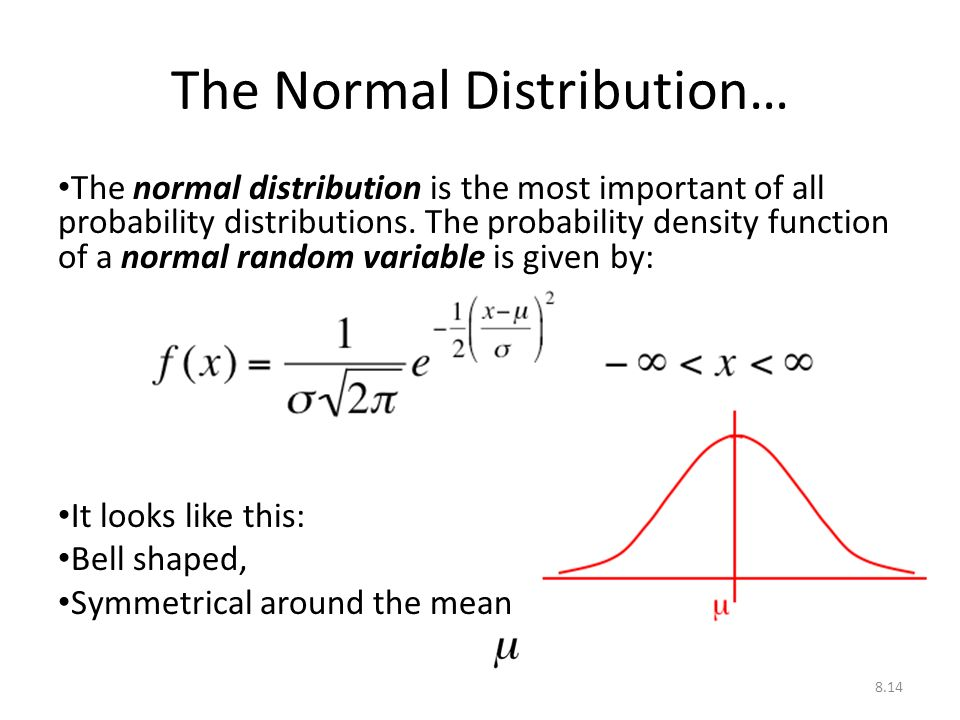

In [2]:
def norm_pdf(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi)) 
    return pdf

In [3]:
y = norm_pdf(10, 0, 1)
y

7.69459862670642e-23

#### The Standard Normal Distribution
It’s a normal distribution with 𝜇 = 0 and 𝜎 = 1, commonly represented by 𝑁(0,1)
We can convert any normal distribution to standard normal distribution i.e 𝑁(0,1) by taking the data points (say 𝑥) and transform it to z=(𝑥-𝜇)/𝜎
This process is called standardizing & the value of z is called a z-score

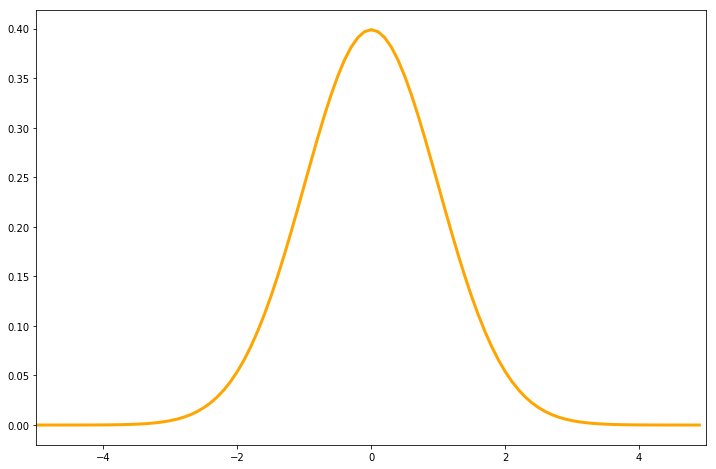

In [52]:
mu = 0
sigma = 1
x = np.arange(-5, 5, 0.1)  # generate sequence number starting at -5, increment by 0.1 until it reaches 5
y = norm_pdf(x, mu, sigma)  # calculate the y according to the normal probability density function
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlim((-5,5))
ax.plot(x,y, color='orange', lw=3)

(array([0.0013674 , 0.        , 0.        , 0.00273481, 0.00273481,
        0.00273481, 0.0013674 , 0.        , 0.00683702, 0.00273481,
        0.00820442, 0.01504144, 0.01367404, 0.00820442, 0.00273481,
        0.02051106, 0.02598067, 0.02871548, 0.0341851 , 0.03281769,
        0.04649173, 0.03828731, 0.05469616, 0.08204423, 0.07520722,
        0.09161606, 0.09982049, 0.08341164, 0.1039227 , 0.12169895,
        0.15725145, 0.1750277 , 0.18049732, 0.19964097, 0.22972386,
        0.22425424, 0.25980674, 0.22835645, 0.26937857, 0.29946146,
        0.32133992, 0.33638136, 0.36099463, 0.39381233, 0.34185098,
        0.38697531, 0.36919906, 0.3828731 , 0.43073223, 0.41295598,
        0.37740348, 0.40885377, 0.41569079, 0.35689242, 0.38697531,
        0.36099463, 0.39654713, 0.33638136, 0.33227915, 0.29125703,
        0.33364655, 0.23519347, 0.27074597, 0.25707194, 0.23656088,
        0.21468241, 0.18733434, 0.16682328, 0.15041443, 0.14357741,
        0.09845308, 0.11349452, 0.08067683, 0.07

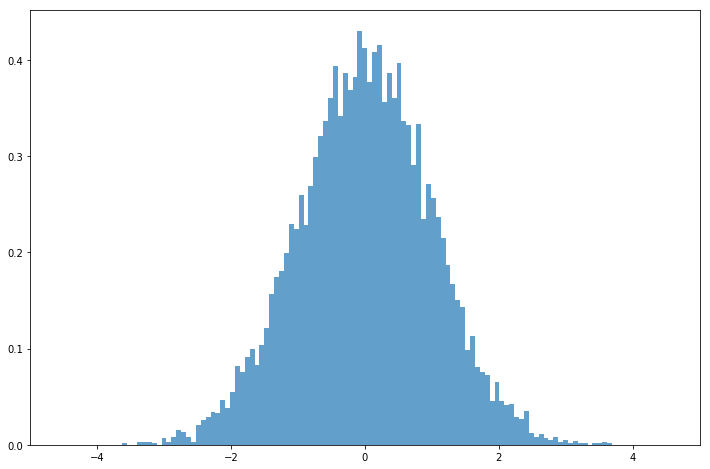

In [24]:
np.random.seed(10)
sample_data = np.random.normal(0,1,10000)
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlim((-5,5))
ax.hist(sample_data, bins=100, alpha=0.7, normed=True)

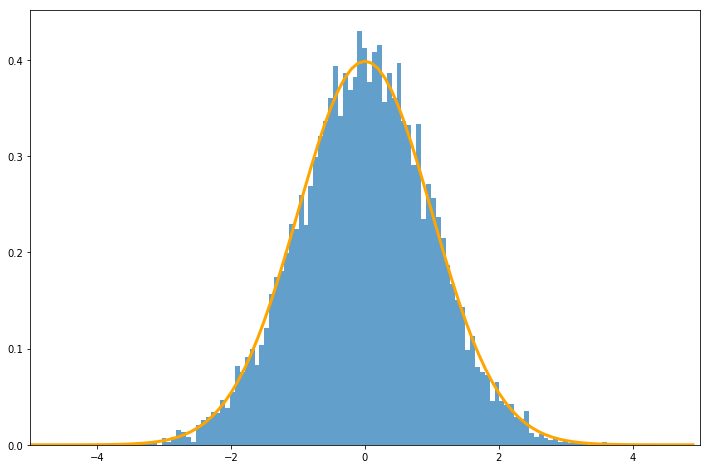

In [67]:
# Plot the histogram and the normal curve together
np.random.seed(10)
sample_data = np.random.normal(0,1,10000)
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlim((-5,5))
ax.hist(sample_data, bins=100, alpha=0.7, normed=True)
ax.plot(x, y, color='orange', lw=3)     # plot by default is a line plot

### The scipy.stats library 

It provides handy facilities for normal distribution so that we don't need to use the raw pro function as seen in the previoius cell. The scipy nickname for the normal distribution is norm. 

This graph shows the relationship between PDF and CDF.

- pdf ( probability density function)

This basically is a probability law for a continuous random variable say X ( for discrete, it is probability mass function).

The probability law defines the chances of the random variable taking a particular value say x, i.e. P (X=x).
However this definition is not valid for continuous random variables because the probability at a given point is zero.
An alternate to this is: pdf= P (x-e<X<=x)/e as e tends to zero.

- CDF ( Cumulative Distribution Function)

As the name cumulative suggests, this is simply the probability upto a particular value of the random variable, say x. Generally denoted by F, F= P (X<=x) for any value of x in the X space. It is defined for both discrete and continuous random variables.

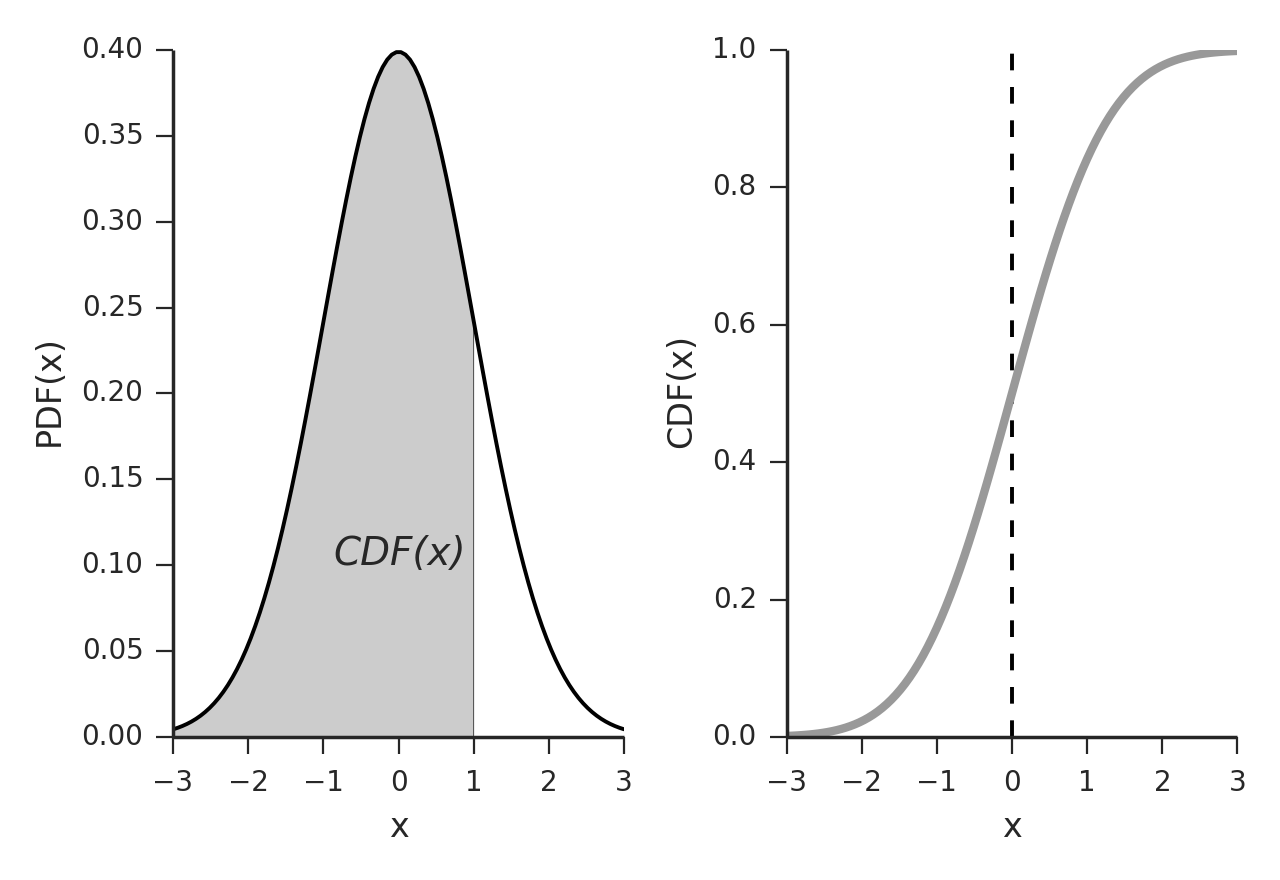

#### Probability Density Function (PDF) of a normal distribution using stats.norm.pdf()


In [5]:
prob_under_minus1 = stats.norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)     

prob_under_1 = stats.norm.cdf(x= 1,  
               loc = 0,               
               scale= 1) 

prob_over_1 = 1 - prob_under_1

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_under_1, prob_over_1, between_prob)

0.15865525393145707 0.8413447460685429 0.15865525393145707 0.6826894921370859


The output shows that roughly 16% of the data generated by a normal distribution with mean 0 and standard deviation 1 is below -1, 16% is above 1 and 68% lies between -1 and 1, which agrees with the 68, 95, 99.7 rule. Let's plot the normal distribution and inspect areas we calculated:

Text(1.4, 0.03, '0.159')

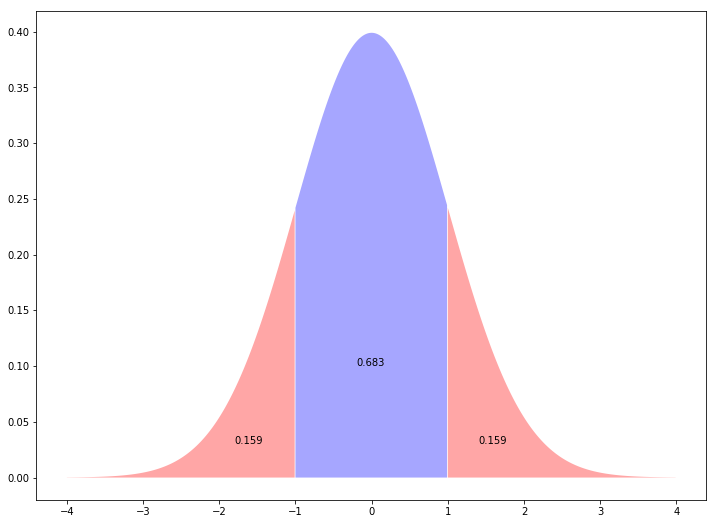

In [70]:
# Plot normal distribution areas

plt.rcParams["figure.figsize"] = (12,9)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3))

The plot above shows the bell shape of the normal distribution, the area below and above one standard deviation and the area within 1 standard deviation of the mean.
Finding quantiles of the normal distribution is a common task when performing statistical tests. You can check normal distribution quantiles with stats.norm.ppf():

In [71]:
print( stats.norm.ppf(q=0.025) ) # Find the quantile for the 2.5% cutoff Percentage point function PPF

print( stats.norm.ppf(q=0.975) ) # Find the quantile for the 97.5% cutoff

-1.9599639845400545
1.959963984540054


The quantile output above confirms that roughly 5% of the data lies more than 2 standard deviations from the mean.
*Note: a mean of 0 and standard deviation of 1 are default values for the normal distribution.

#### Cumulative Distribution Function (CDC) of a normal distribution using stats.norm.cdf()

In [5]:
# Cumulative Distribution Function (CDF)
# The location (loc) keyword specifies the mean. 
# The scale (scale) keyword specifies the standard deviation.

stats.norm.cdf(1.96, loc=0, scale=1)

0.9750021048517795

In [7]:
# The default loc is 0, scale is 1
stats.norm.cdf(-1.96)

0.024997895148220435